In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
dataset = pd.read_csv('../loan.csv')
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [21]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
dataset.shape

(614, 13)

In [23]:
min_range = dataset['CoapplicantIncome'].mean() - (dataset['CoapplicantIncome'].std() * 3)
max_range = dataset['CoapplicantIncome'].mean() + (dataset['CoapplicantIncome'].std() * 3)
min_range, max_range

(np.float64(-7157.4993096454655), np.float64(10399.990905699668))

In [24]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


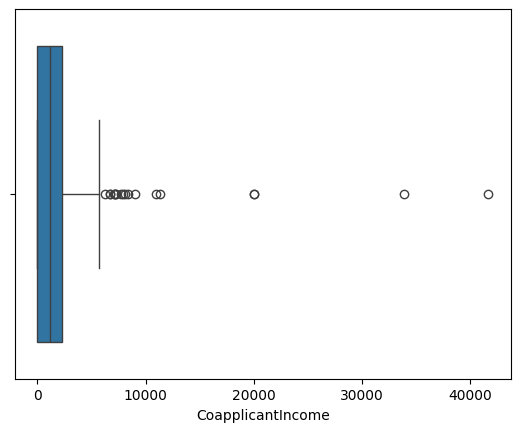

In [25]:
sns.boxplot(x='CoapplicantIncome', data=dataset)
plt.show()

In [26]:
new_dataset = dataset[dataset['CoapplicantIncome'] <= max_range]

In [29]:
new_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,608.000000,608.000000,586.000000,594.000000,559.000000
mean,5416.143092,1410.646250,145.136519,342.121212,0.842576
std,6123.586316,1685.286222,83.825124,65.088956,0.364526
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2892.750000,0.000000,100.000000,360.000000,1.000000
50%,3813.500000,1125.500000,127.500000,360.000000,1.000000
75%,5803.750000,2250.750000,165.750000,360.000000,1.000000
max,81000.000000,8980.000000,700.000000,480.000000,1.000000


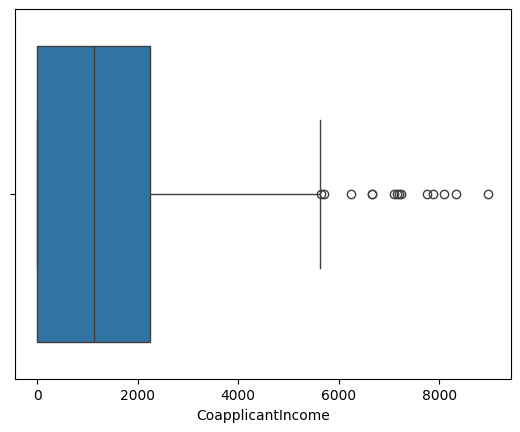

In [30]:
sns.boxplot(x='CoapplicantIncome', data=new_dataset)
plt.show()

In [31]:
from sklearn.preprocessing import FunctionTransformer

In [32]:
ft = FunctionTransformer(func=np.log1p)

In [33]:
ft.fit(dataset[['CoapplicantIncome']])

,func,<ufunc 'log1p'>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None
,inv_kw_args,None


In [35]:
dataset['tf'] = ft.transform(dataset[['CoapplicantIncome']])

In [ ]:
# we use feature transform because it bring the data look like normal distribution and we don't need to remove outliers